## MA


### Preliminaries

Datasets:

* The [QSAR](http://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation) data for predicting the biochemical activity of a molecule.
* The [Wisconsin breast cancer wisconsin dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).
  

## Part 1:  choosing optimal hyperparameters

Just about any machine learning algorithm has some **hyperparameters**.  These are parameters that are set by the user and are not determined as part of the training process.
The perceptron for example, has two of those - the number of epochs and the learning rate.  For the k-nearest neighbor classifier (kNN) it's the number of neighbors, $k$, and for the linear SVM it's the soft margin constant, $C$.  Our objective in machine learning is to obtain classifiers with high accuracy, and have good estimates of how well they are performing.  In other words, we need to know how accurate a classifier would be on unseen data.  This is why we use separate test sets that the classifier has not seen for evaluating accuracy.

When working with classifiers with hyperparameters you may be tempted to apply the following procedure:

* Randomly split the data into separate train and test sets.
* Loop over a list of candidate values for the hyperparameter.
* For each value, train the classifier over the training set and evaluate its performance on the test set.
* Choose the parameter value that maximizes the accuracy over the test set, and report the accuracy that you obtained.

However, it turns out that this procedure is flawed, and the resulting accuracy estimate can be overly optimistic.  This is because the choice of the best performing parameter value used information about the test set: by selecting the best value we used information about the labels of the test set.  Therefore, the resulting accuracy estimate uses the labels of the test set, invalidating this accuracy estimate as being totally without any knowledge of the test set.

Here is a better approach.  Rather than splitting the data into train and test sets, we will now split the data into three sets:  **train, validation, and test**.  The validation set will be used for evaluation of different values of the hyperparameter, leading to the following approach:

* Randomly split the data into separate train, validation, and test sets (say with ratios of 0.5, 0.2, 0.3).
* Loop over a list of candidate values for the hyperparameter.
* For each value, train the classifier over the **training set** and evaluate its performance on the **validation set**. 
* Choose the best classifier, and report its accuracy over the **test set**.

Your task is as follows:

* Use the method described above to evaluate the performance of the kNN classifier over the QSAR and Wisconsin breast cancer dataset.  Use a wide range of $k$ values.  Repeat the process ten times over different train/test splits and report the average accuracy over the test set.  What value of $k$ was chosen?  Note that the optimal value of $k$ may vary for different splits.  Comment on your results.

* Perform the same experiment for the linear SVM. In this case the soft-margin constant $C$ is the hyperparameter that requires an informed choice.  Use a wide range of values for $C$, as we have done in class.  Comment on your results.

You may use the scikit-learn kNN and SVM implementations and `train_test_split`.

## Part 2:  PCA for removing noise from data

As we have seen in class, performance of the nearest neighbor classifer degrades when the data has noisy features that are not relevant to the classification problem.  To remedy this problem, we will use PCA to reduce the dimensionality of the data.

Here is your task:

* Use the QSAR dataset and evaluate performance of K nearest neighbors and SVM.  For simplicity, choose the values of K and $C$ that you selected in part 1.  Add 2000 noise features and evaluate model performance after doing so.
* Next, use PCA to represent the data in the space of a given number of principal components.  Evaluate the performance of the KNN and SVM classifiers as you vary the number of principal components (no need to go above the original dimensionality of the dataset when doing so).  Plot the accuracy of each classifier as you vary the number of components.
* Discuss your results:  was PCA useful for improving classifier performance?  Which of the two classifiers appears to be more robust to noise?
* In class your instructer noted that the data needs to be centered or standardized before applying PCA.  Do you observe a difference in classifier performance when you center or standardize the data before applying PCA?  (Recall that centering refers to subtracting the mean from each feature, making it so that each feature has a mean of 0).


### About SVM Parameters

Cfloat, default=1.0 <br>
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty. <br>
The regularization parameter (lambda) serves as a degree of importance that is given to misclassifications. SVM pose a quadratic optimization problem that looks for maximizing the margin between both classes and minimizing the amount <br>
gamma: <br>
gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [6]:
def SVM_eval(max_c,train_data, train_label, test_data, test_label):
    scores = [float("-inf")]
    for i in range(1,max_c):
        svm_clf = make_pipeline(StandardScaler(), SVC(C= i , gamma='auto'))
        svm_clf.fit(train_data, train_label)
        scores.append(svm_clf.score(test_data, test_label))
    return scores

def plot_SVM_acc(max_c,scores):
    plt.figure(figsize=(10,6))
    plt.plot(range(1,max_c + 1),scores, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
    plt.title('SVM score vs constant C')
    plt.xlabel('C')
    plt.ylabel('Mean accuracy on the given test data')
    print("Max accuracy error:",max(scores),"at C =",scores.index(max(scores)))    
    

Max accuracy error: 0.9824561403508771 at C = 2


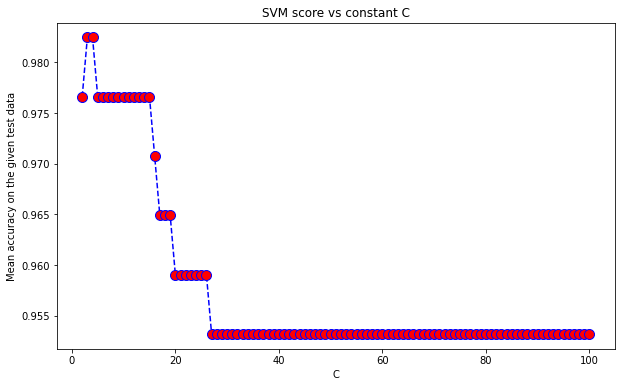

In [92]:
# SVM db1 70/30
data = load_breast_cancer()
X, y = data.data, data.target
train_ratio = 0.70
max_c = 100
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio, random_state=42)
scores = SVM_eval(max_c, X_train, y_train, X_test, y_test)
plot_SVM_acc(max_c,scores) 

Max accuracy error: 0.9590643274853801 at C = 3


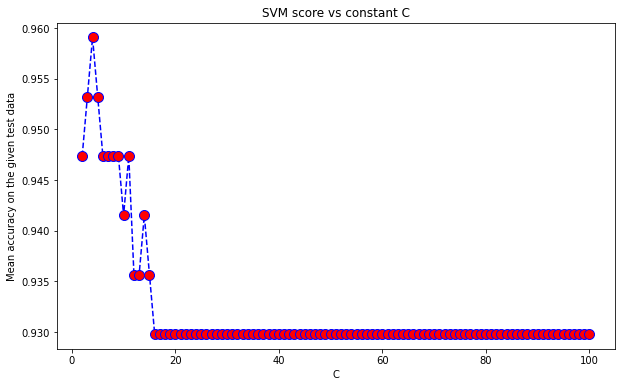

In [93]:
# SVM db1 50/20/30
data = load_breast_cancer()
X, y = data.data, data.target
train_ratio = 0.50
validation_ratio = 0.2
test_ratio = 0.3

max_c = 100
# test is now 30% of the initial data set
# validation is now 20% of the initial data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=13) 
scores = SVM_eval(max_c, X_val, y_val, X_test, y_test)
plot_SVM_acc(max_c,scores) 

Max accuracy error: 0.8958990536277602 at C = 1


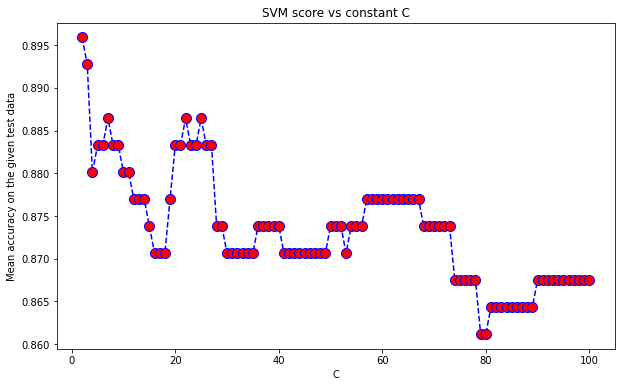

In [94]:
# SVM db2 70/30
dataPath = r'qsar\biodeg.csv'
qsar_df = pd.read_csv(dataPath, header=None, sep = ";")
# Cooking
qsar_df[41] = qsar_df[41].map({'RB':1, 'NRB':0})
X = qsar_df.drop(41, axis = 1)
y = qsar_df[41]

train_ratio = 0.70
max_c = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=42)
scores = SVM_eval(max_c, X_train, y_train, X_test, y_test)
plot_SVM_acc(max_c,scores) 

Max accuracy error: 0.8738170347003155 at C = 5


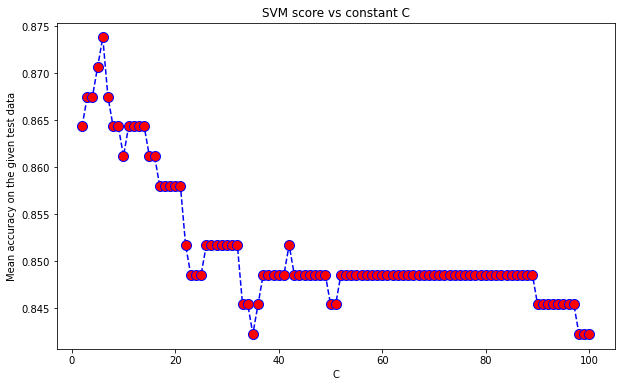

In [83]:
# SVM db2 50/20/30 
train_ratio = 0.50
validation_ratio = 0.2
test_ratio = 0.3
max_c = 100
# test is now 30% of the initial data set
# validation is now 20% of the initial data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=13) 

scores = SVM_eval(max_c, X_val, y_val, X_test, y_test)
plot_SVM_acc(max_c,scores) 



# KNN

In [95]:
def KNN_eval(K, train_data, train_label, test_data, test_label):
    error_rates = [float("inf")]
    for i in range(1,K):
        knn = KNeighborsClassifier(n_neighbors= i)
        knn.fit(train_data,train_label)
        pred_i = knn.predict(test_data)
        error_rates.append(np.mean(pred_i != test_label))
    return error_rates


def plot_KNN_err(K,error_rates):
    plt.figure(figsize=(10,6))
    plt.plot(range(1,K + 1),error_rates, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    print("Minimum error:",min(error_rates),"at K =",error_rates.index(min(error_rates)))    

Minimum error: 0.017543859649122806 at K = 10


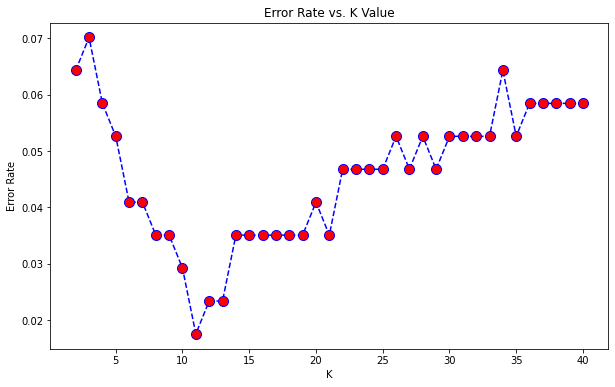

In [97]:
# KNN 70/30 on db1
train_ratio = 0.7
data_bunch = load_breast_cancer()
data = load_breast_cancer()
X, y = data.data, data.target

K = 40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=42)
error_rates = KNN_eval(K, X_train, y_train, X_test, y_test)
plot_KNN_err(K,error_rates)

Minimum error: 0.04093567251461988 at K = 4


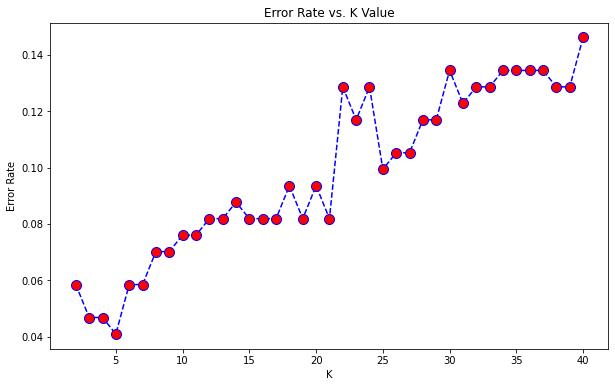

In [99]:
# KNN db1 50/20/30 on db1
train_ratio = 0.50
validation_ratio = 0.2
test_ratio = 0.3

data_bunch = load_breast_cancer()
data = load_breast_cancer()
X, y = data.data, data.target
K = 40
# test is now 30% of the initial data set
# validation is now 20% of the initial data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=13) 

error_rates = KNN_eval(K, X_val, y_val, X_test, y_test)
plot_KNN_err(K,error_rates)

Minimum error: 0.138801261829653 at K = 3


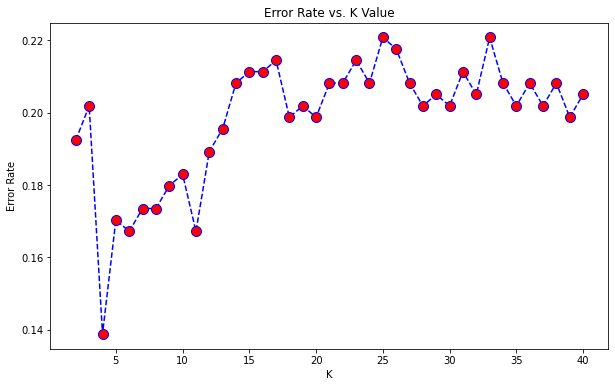

In [100]:
# KNN db2 70/30
dataPath = r'qsar\biodeg.csv'
qsar_df = pd.read_csv(dataPath, header=None, sep = ";")
# Cooking
qsar_df[41] = qsar_df[41].map({'RB':1, 'NRB':0})
X = qsar_df.drop(41, axis = 1)
y = qsar_df[41]

train_ratio = 0.70
K = 40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=42)
error_rates = KNN_eval(K, X_train, y_train, X_test, y_test)
plot_KNN_err(K,error_rates)

Minimum error: 0.1861198738170347 at K = 1


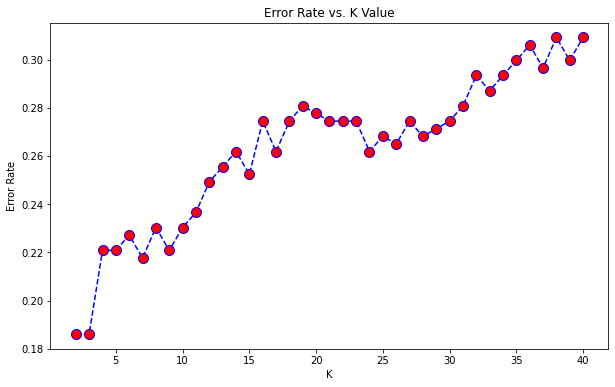

In [101]:
# KNN db2 50/20/30
dataPath = r'qsar\biodeg.csv'
qsar_df = pd.read_csv(dataPath, header=None, sep = ";")
# Cooking
qsar_df[41] = qsar_df[41].map({'RB':1, 'NRB':0})
X = qsar_df.drop(41, axis = 1)
y = qsar_df[41]

train_ratio = 0.50
validation_ratio = 0.2
test_ratio = 0.3

K = 40
# test is now 30% of the initial data set
# validation is now 20% of the initial data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=13) 

error_rates = KNN_eval(K, X_val, y_val, X_test, y_test)
plot_KNN_err(K,error_rates)


# Part 2

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [32]:
# PCA First DB
from sklearn.decomposition import PCA
data = load_breast_cancer()
X, y = data.data, data.target
lst = data.data
list_name = data.feature_names
df = pd.DataFrame (lst, columns = list_name)
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)

In [33]:
def scatter_coefficient(X, normalize=True):
    corr = np.corrcoef(X, rowvar=False)
    if normalize:
        return np.linalg.det(corr) / np.trace(corr)
    else:
        return np.linalg.det(corr)

In [37]:
component = scatter_coefficient(scaled_data, normalize=True)
component = max(2, component)
print("Best component number {0}".format(component))
print(component)

Best component number 2
2


In [14]:
pca=PCA(n_components=component)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [15]:
scaled_data.shape

(569, 30)

In [16]:
x_pca.shape

(569, 1)

Text(0, 0.5, 'Second principle component')

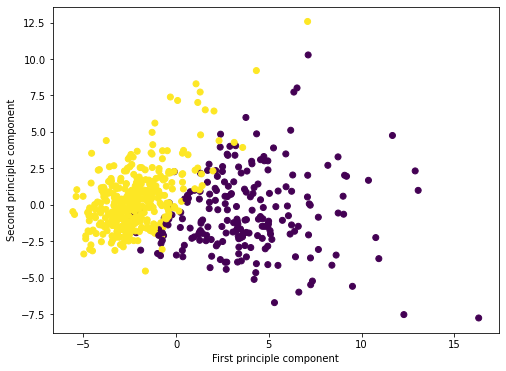

In [116]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

Minimum error: 0.04093567251461988 at K = 4


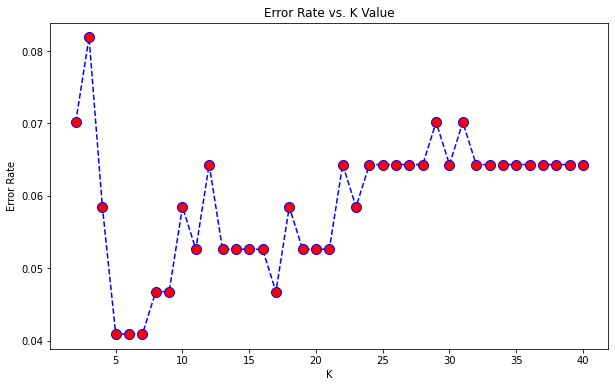

In [141]:
# KNN PCA2 of db1 70/30

train_ratio = 0.70
K = 40
X_train, X_test, y_train, y_test = train_test_split(x_pca,cancer['target'] , test_size=1 - train_ratio, random_state=42)
error_rates = KNN_eval(K, X_train, y_train, X_test, y_test)
plot_KNN_err(K,error_rates)

### QSAR dataset 

In [117]:
dataPath = r'qsar\biodeg.csv'
qsar_df = pd.read_csv(dataPath, header=None, sep = ";")
# Cooking
qsar_df[41] = qsar_df[41].map({'RB':1, 'NRB':0})

In [118]:
scaler=StandardScaler()
scaler.fit(qsar_df)
qsar_scaled_data=scaler.transform(qsar_df)

In [120]:
qsar_scaled_data
# conversion to df
qsar_scaled_df = pd.DataFrame(qsar_scaled_data)

In [132]:
pca=PCA(n_components= 2)
pca.fit(qsar_scaled_df)
qsar_pca=pca.transform(qsar_scaled_df)


In [133]:
qsar_pca.shape

(1055, 2)

Text(0, 0.5, 'Second principle component')

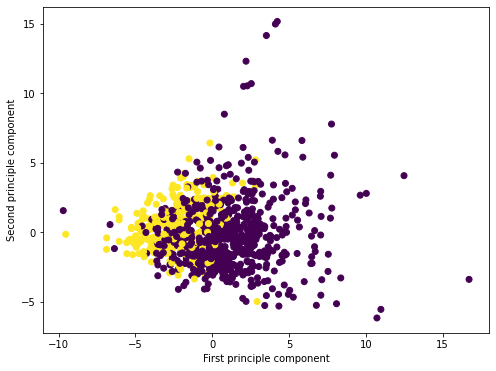

In [134]:
plt.figure(figsize=(8,6))
plt.scatter(qsar_pca[:,0],qsar_pca[:,1],c=qsar_df[41])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [137]:
X = qsar_pca
y = qsar_df[41]

Minimum error: 0.2082018927444795 at K = 11


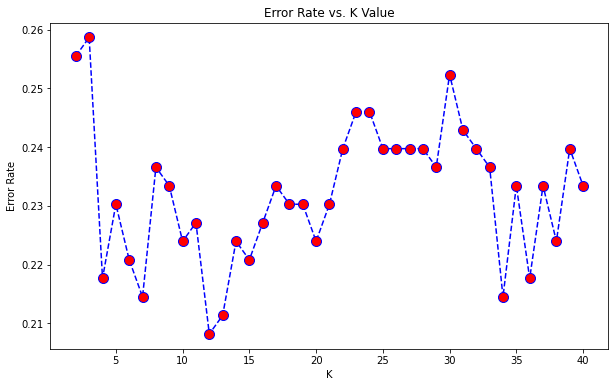

In [138]:
# KNN PCA2 of db2 70/30

train_ratio = 0.70
K = 40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=42)
error_rates = KNN_eval(K, X_train, y_train, X_test, y_test)
plot_KNN_err(K,error_rates)